In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import celltypist

In [ ]:
# import session_info
# session_info.show()

In [3]:
sc.settings.set_figure_params(dpi=120)

# Variables

In [4]:
adata_dir = '/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects'
sample_id = 'HEA_FOET14880396'

In [5]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk/Aug2024'
table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

# Read in data

bin2cell output which has celltypist output as well

In [6]:
# read in 
adata = sc.read_h5ad(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025', 'HistologicalAnnotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HistologicalAnnotation_colors', 'celltypist_coarse2midmod_colors', 'celltypist_coarse_colors

# Plot

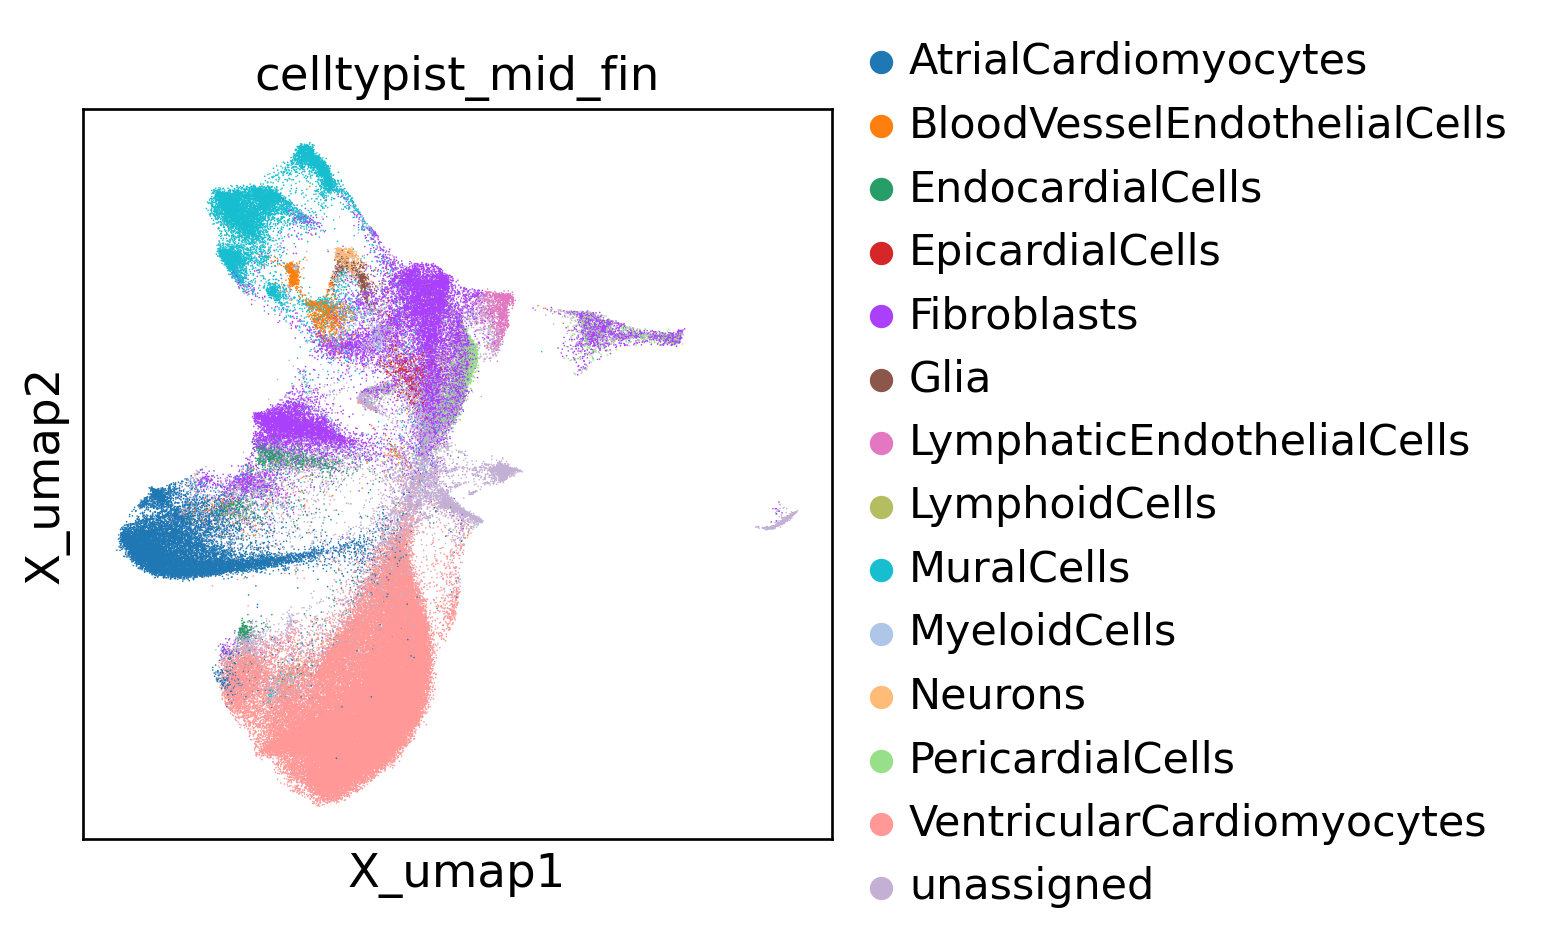

In [7]:
sc.pl.embedding(adata,basis='X_umap',color=["celltypist_mid_fin"],wspace=0.2,cmap='RdPu')

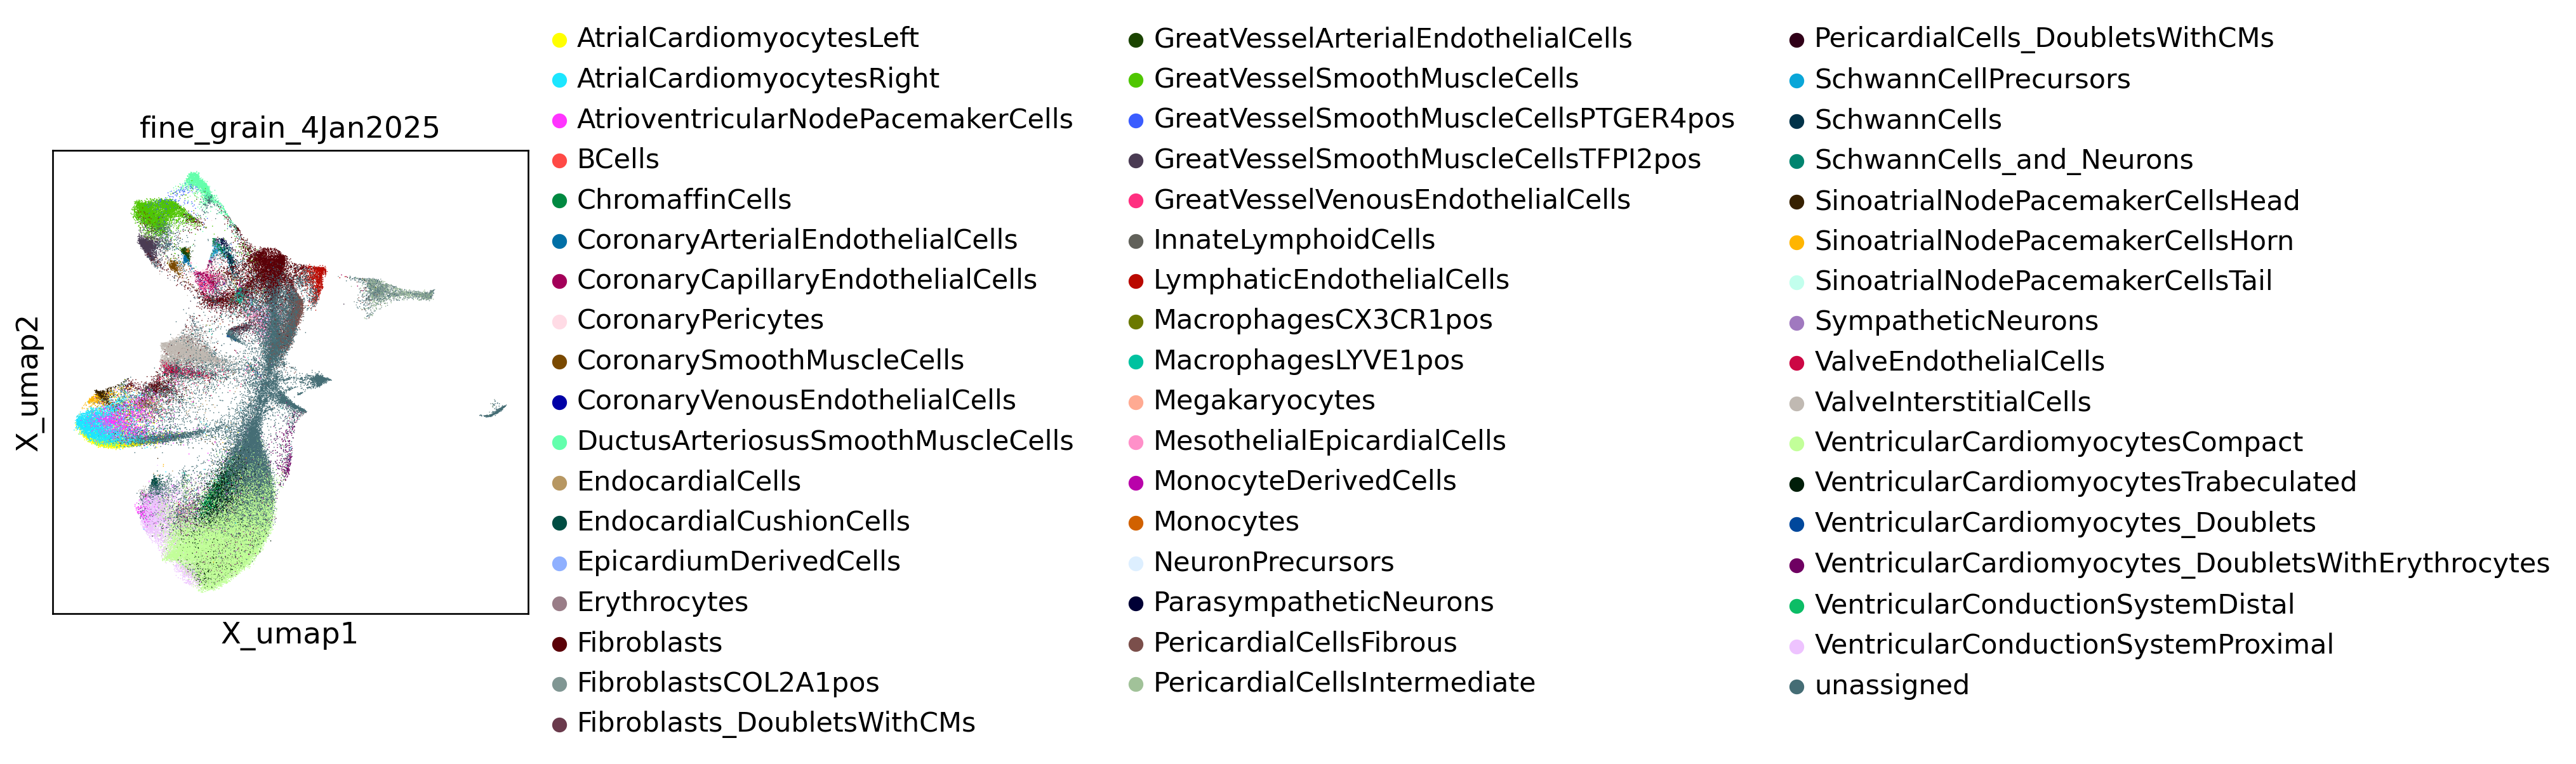

In [9]:
sc.pl.embedding(adata,basis='X_umap',color=['fine_grain_4Jan2025'],wspace=0.2,cmap='RdPu')

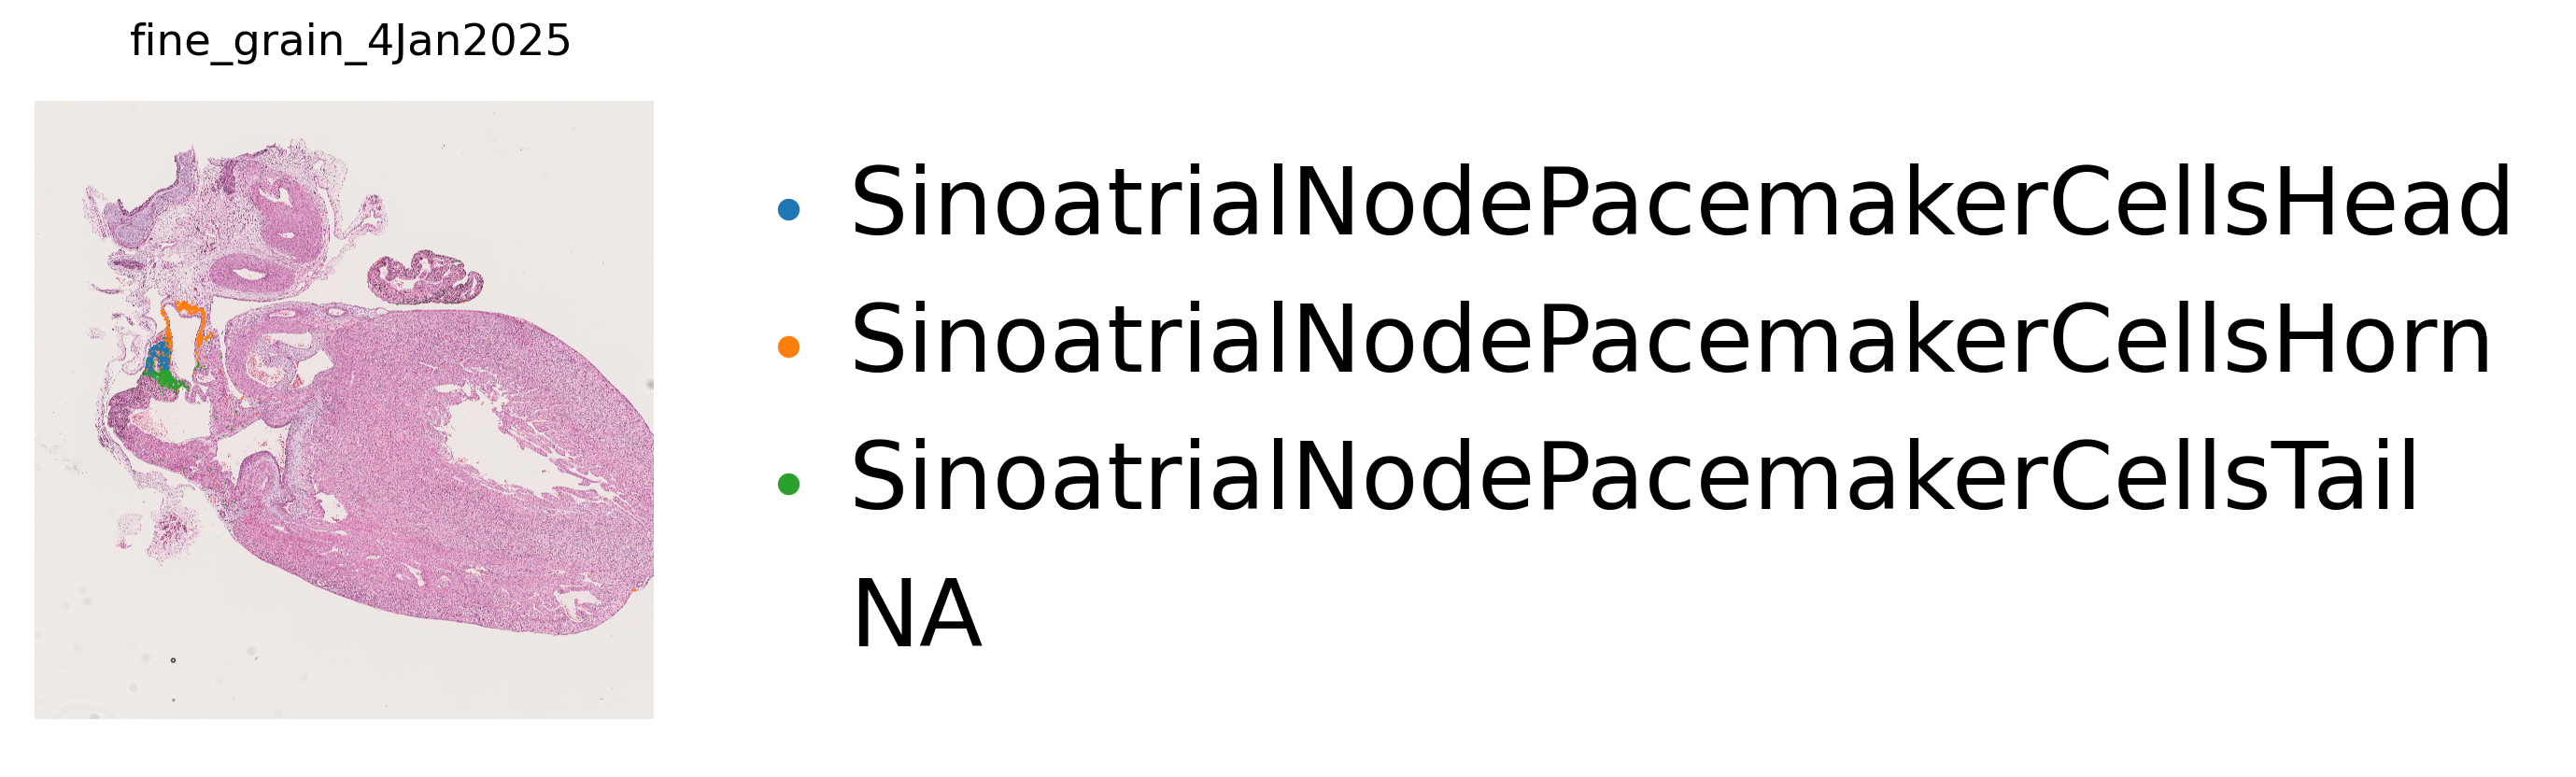

In [13]:
cells = [
    'SinoatrialNodePacemakerCellsHorn',
    'SinoatrialNodePacemakerCellsHead',
    'SinoatrialNodePacemakerCellsTail',
    # 'AtrioventricularNodePacemakerCells',
    # 'VentricularConductionSystem'
    
    # 'MacrophagesCX3CR1pos',
    # 'ParasympatheticNeurons'
]

celltype_key = 'fine_grain_4Jan2025'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='tab:orange'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='tab:blue'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsTail',)]='tab:green'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('AtrioventricularNodePacemakerCells')]='orange'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('VentricularConductionSystem')]='mediumpurple'

sc.pl.spatial(adata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

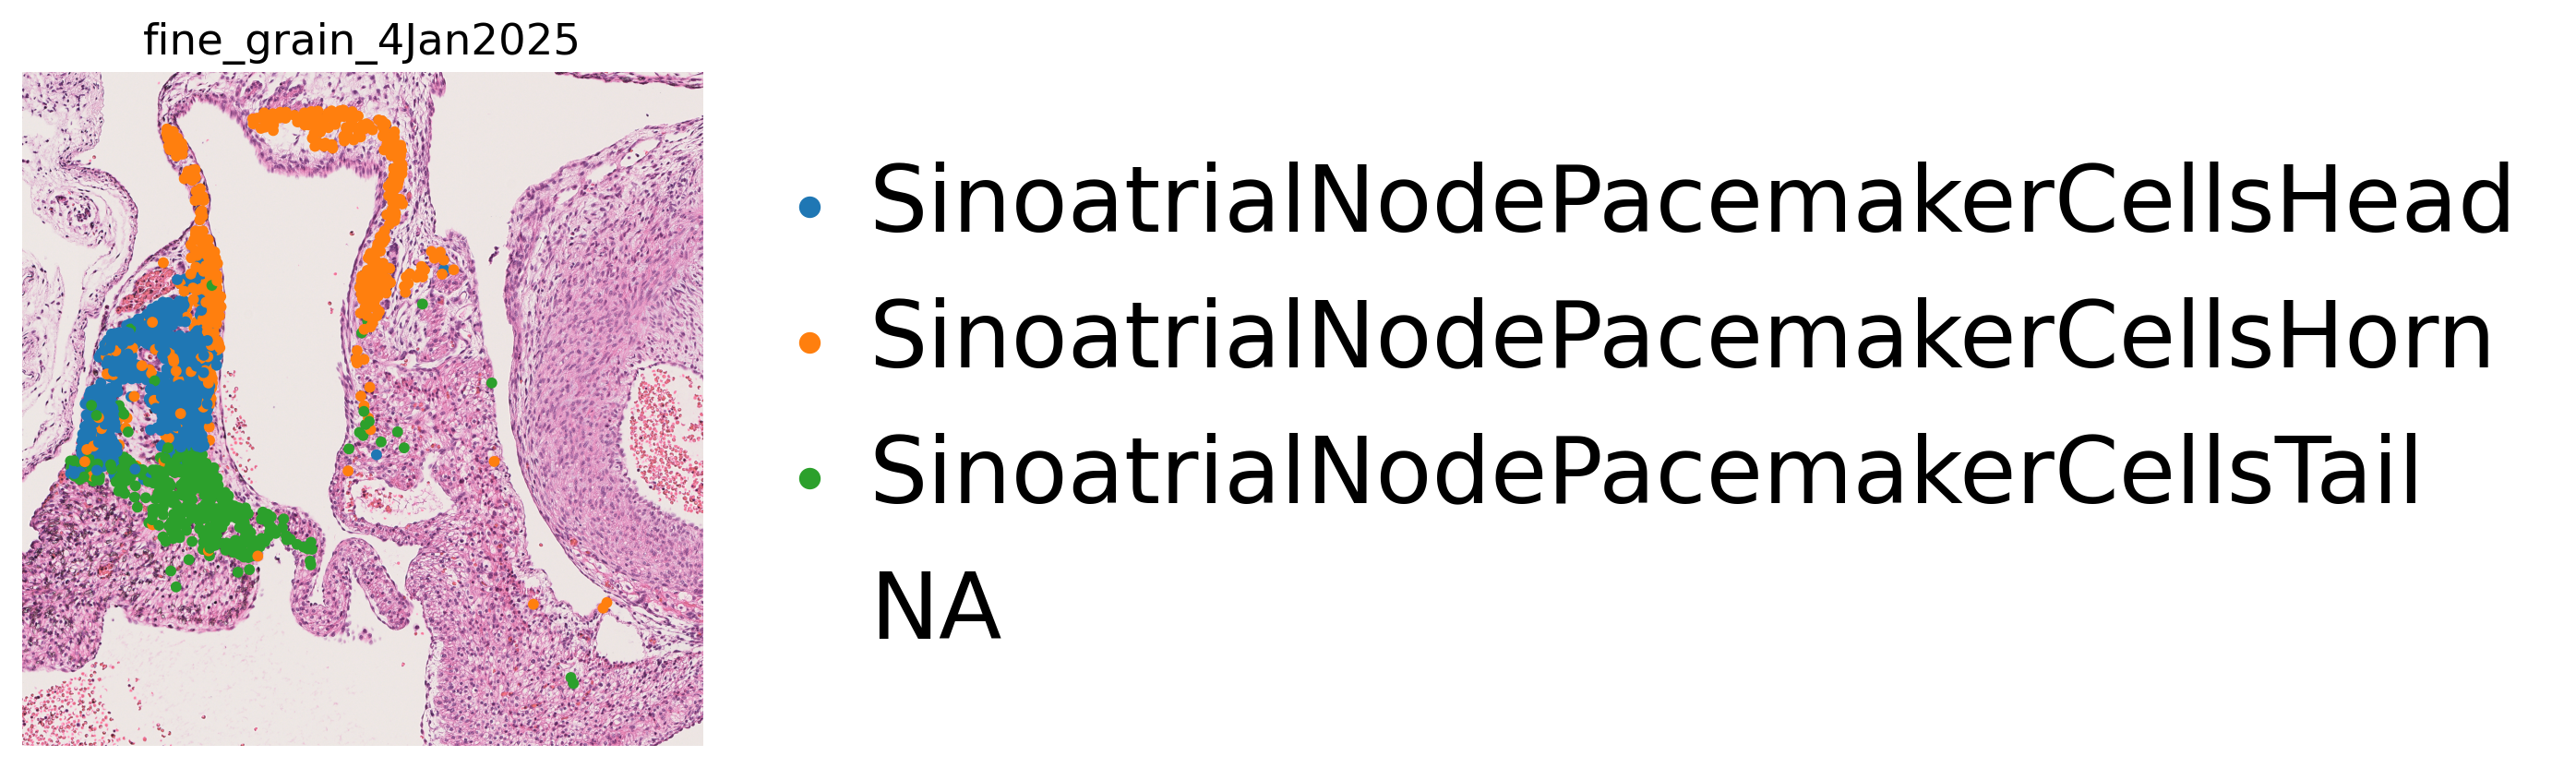

In [14]:
cells = [
     'SinoatrialNodePacemakerCellsHorn',
    'SinoatrialNodePacemakerCellsHead',
    'SinoatrialNodePacemakerCellsTail',
    # 'AtrioventricularNodePacemakerCells',
    # 'VentricularConductionSystem'
]

mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]
n_celltype = len(bdata.obs[celltype_key].cat.categories)
bdata.uns[f'{celltype_key}_colors'] = list(np.repeat('#ffff00',n_celltype))

# update colors
for c in cells:
    # get color in adata
    ind = list(adata.obs[celltype_key].cat.categories).index(c)
    color = adata.uns[f'{celltype_key}_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs[celltype_key].cat.categories).index(c)
    bdata.uns[f'{celltype_key}_colors'][ind] = color

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

# Annotate

* start: tip of the SAN_PacemakerCellsHorn
* end: end of SAN_PacemakerCellsTail

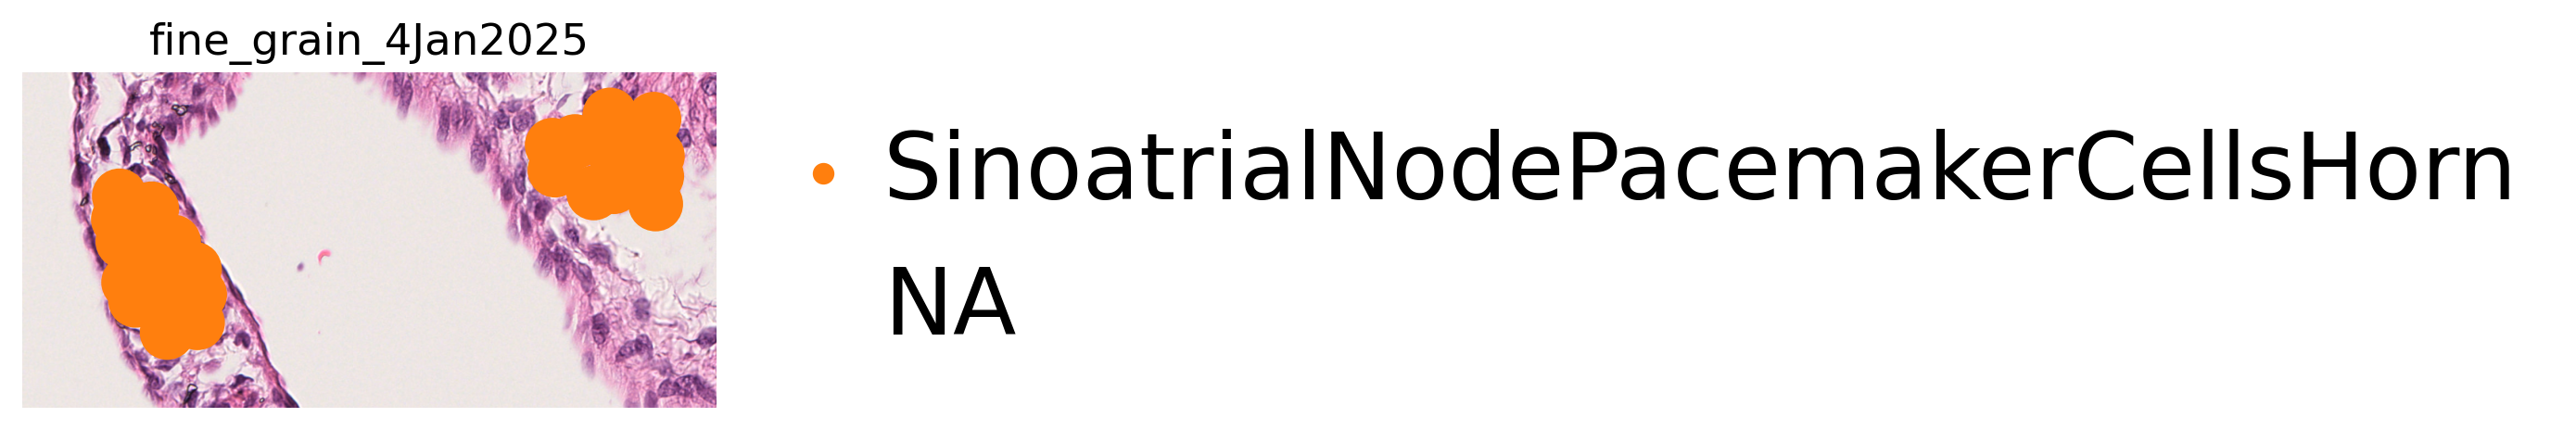

32


In [15]:
# start
cells = [
     'SinoatrialNodePacemakerCellsHorn',
    #'SinoatrialNodePacemakerCellsHead',
    #'SinoatrialNodePacemakerCellsTail',
    # 'AtrioventricularNodePacemakerCells',
    # 'VentricularConductionSystem'
]

mask = ((adata.obs['array_row'] >= 2250) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 700) & 
        (adata.obs['array_col'] <= 820)
       )
bdata = adata[mask]
n_celltype = len(bdata.obs[celltype_key].cat.categories)
bdata.uns[f'{celltype_key}_colors'] = list(np.repeat('#ffff00',n_celltype))

# update colors
for c in cells:
    # get color in adata
    ind = list(adata.obs[celltype_key].cat.categories).index(c)
    color = adata.uns[f'{celltype_key}_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs[celltype_key].cat.categories).index(c)
    bdata.uns[f'{celltype_key}_colors'][ind] = color

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

# assign
start_cells = bdata.obs_names[bdata.obs[celltype_key]=='SinoatrialNodePacemakerCellsHorn']
print(len(start_cells))

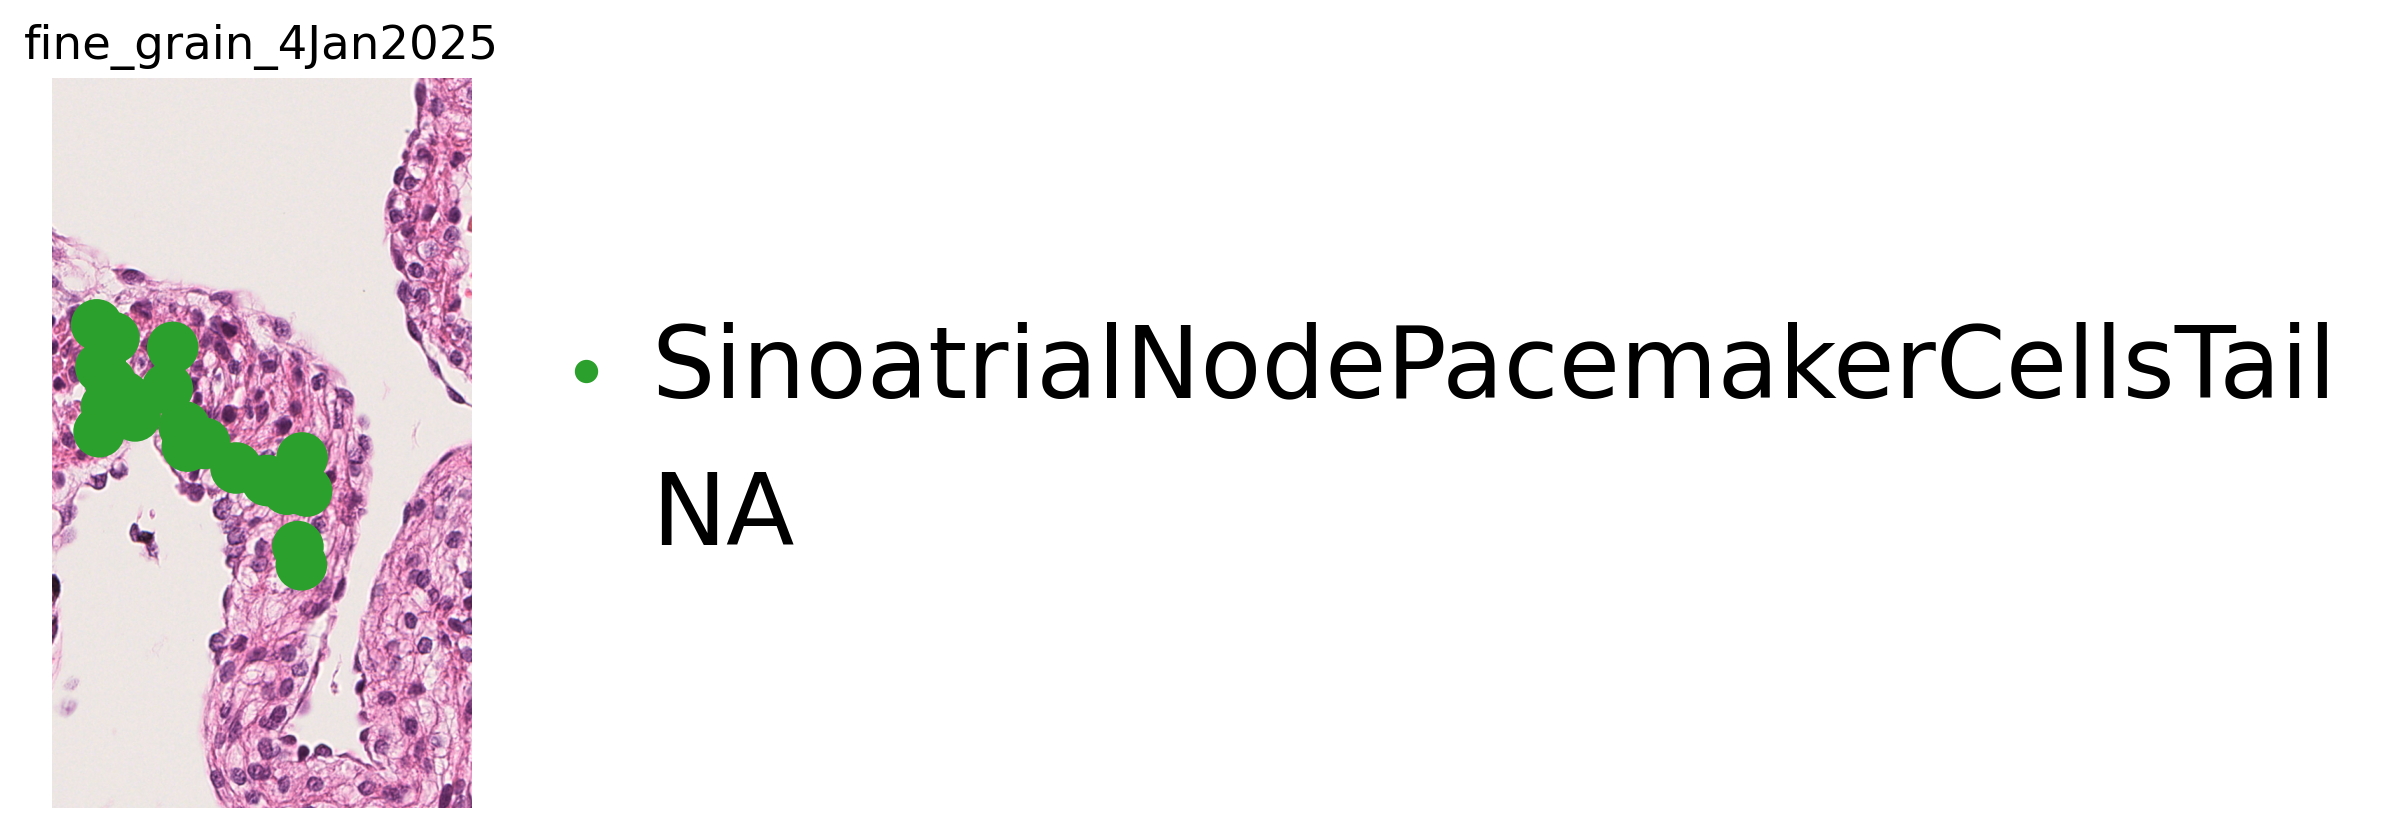

20


In [16]:
# end
cells = [
    #  'SinoatrialNodePacemakerCellsHorn',
    # 'SinoatrialNodePacemakerCellsHead',
    'SinoatrialNodePacemakerCellsTail',
    # 'AtrioventricularNodePacemakerCells',
    # 'VentricularConductionSystem'
]

mask = ((adata.obs['array_row'] >= 1800) & 
        (adata.obs['array_row'] <= 2200) & 
        (adata.obs['array_col'] >= 800) & 
        (adata.obs['array_col'] <= 870)
       )
bdata = adata[mask]
n_celltype = len(bdata.obs[celltype_key].cat.categories)
bdata.uns[f'{celltype_key}_colors'] = list(np.repeat('#ffff00',n_celltype))

# update colors
for c in cells:
    # get color in adata
    ind = list(adata.obs[celltype_key].cat.categories).index(c)
    color = adata.uns[f'{celltype_key}_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs[celltype_key].cat.categories).index(c)
    bdata.uns[f'{celltype_key}_colors'][ind] = color

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

# assign
end_cells = bdata.obs_names[bdata.obs[celltype_key]=='SinoatrialNodePacemakerCellsTail']
print(len(end_cells))

... storing 'SANaxis_landmarks' as categorical


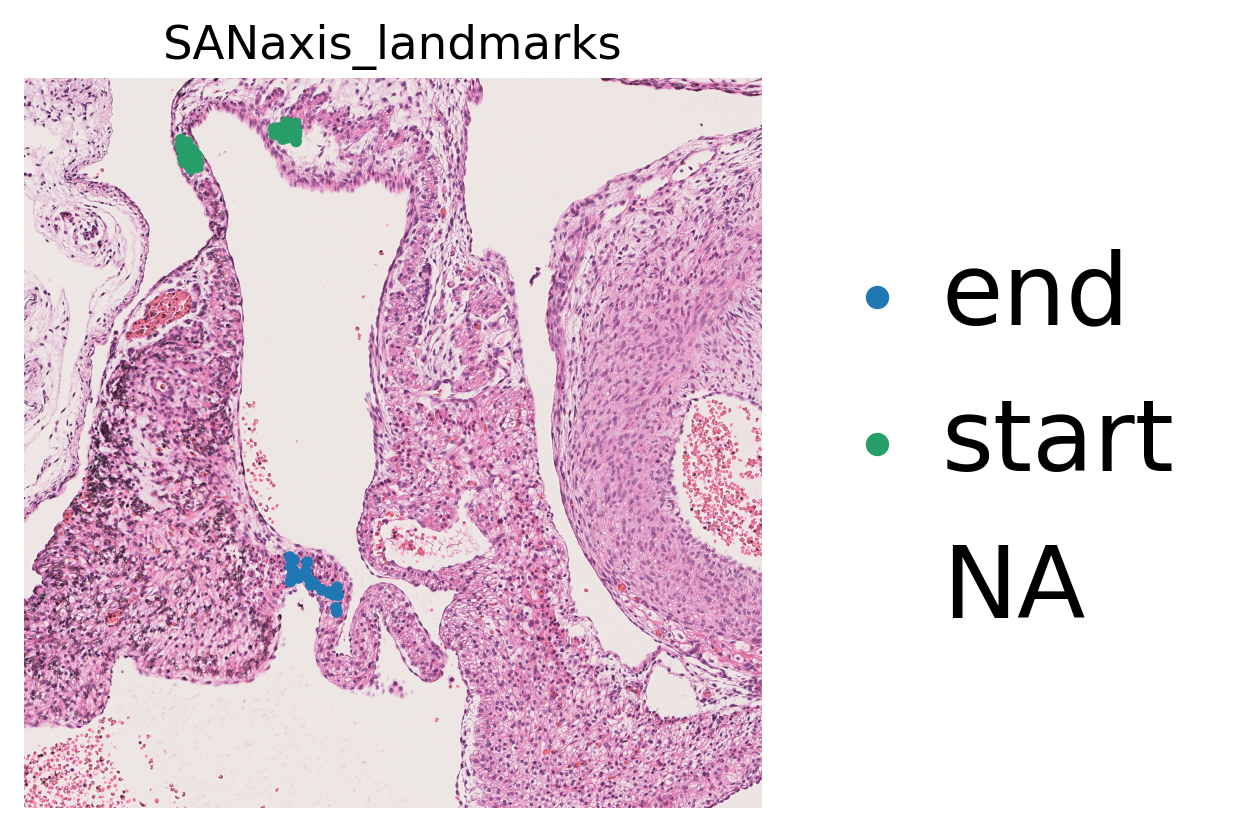

In [17]:
# plot landmarks
adata.obs['SANaxis_landmarks'] = 'nan'
adata.obs.loc[start_cells,'SANaxis_landmarks'] = 'start'
adata.obs.loc[end_cells,'SANaxis_landmarks'] = 'end'

mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, color='SANaxis_landmarks', groups=['start','end'],
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30, spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

# Save

In [18]:
adata.write(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

... storing 'SANaxis_landmarks' as categorical


AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025', 'HistologicalAnnotation', 'SANaxis_landmarks'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HistologicalAnnotation_colors', 'celltypist_coarse2midmod_colors', 'cel